In [2]:
import numpy as np
import matplotlib.pyplot as plt
from .algorithms

In [3]:
# Data Generating Model
def data_generating_model(n, w):
    np.random.seed(42)
    z = np.empty((n, 2))
    z[:, 0] = np.random.uniform(-10, 10, size=n)
    p = w[0] + w[1] * z[:, 0]
    p = np.exp(p) / (1 + np.exp(p))
    z[:, 1] = np.random.binomial(1, p, size=n)
    return z

n_obs = 500
w_true = np.array([0, 1])
z_obs = data_generating_model(n_obs, w_true)

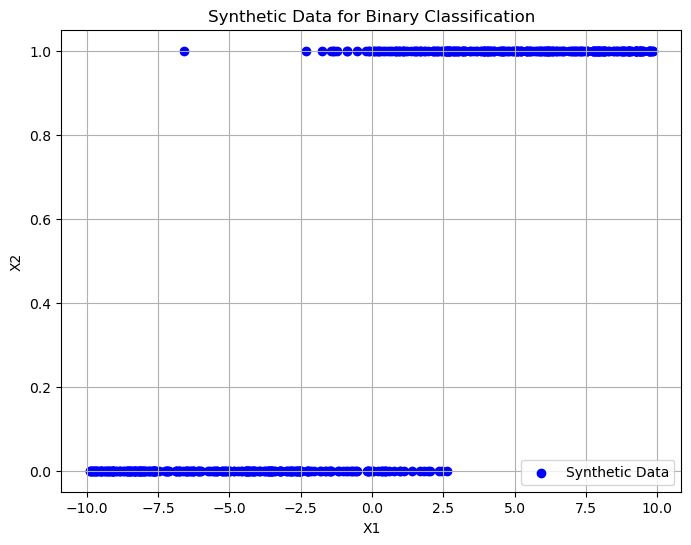

In [4]:
# Plotting the Synthetic Data
plt.figure(figsize=(8, 6))
plt.scatter(z_obs[:, 0], z_obs[:, 1], c='blue', marker='o', label='Synthetic Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Data for Binary Classification')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Prediction Rule
def prediction_rule(x, w):
    h = w[0] + w[1] * x
    h = np.exp(h) / (1.0 + np.exp(h))
    return h

# Loss Function
def loss_fun(w, z):
    x, y = z
    h = prediction_rule(x, w)
    ell = -y * np.log(h) - (1 - y) * np.log(1 - h)
    return ell

# Gradient of Loss Function
def grad_loss_fun(w, z):
    x, y = z
    h = prediction_rule(x, w)
    grd = np.array([h - y, (h - y) * x])
    return grd

# Gradient of Risk Function
def grad_risk_fun(w, z, n):
    grd = np.zeros_like(w)
    for i in range(n):
        grd += grad_loss_fun(w, z[i, :])
    grd /= n
    return grd

In [6]:
# Gradient Descent Algorithm
def gd(grad_fun, seed, learning_rate=0.1, max_epochs=1000, stopping_tolerance=1e-6, return_trace=False):
    w = np.array(seed)  # Set seed
    
    trace = [w]  # Initialize trace

    for epoch in range(max_epochs):
        grad = grad_fun(w)  # Compute gradient
        w = w - learning_rate * grad  # Update parameter
        trace.append(w.copy())  # Append the current parameter value to the trace

        if np.linalg.norm(grad) < stopping_tolerance:  # Check for convergence based on tolerance
            break
    
    if return_trace:
        return w, np.array(trace)
    else:
        return w

In [7]:
def df(w):
    return grad_risk_fun(w, z_obs, n_obs)
    
optimal_w, w_trace = gd(df, (-1, 1.5), return_trace=True)

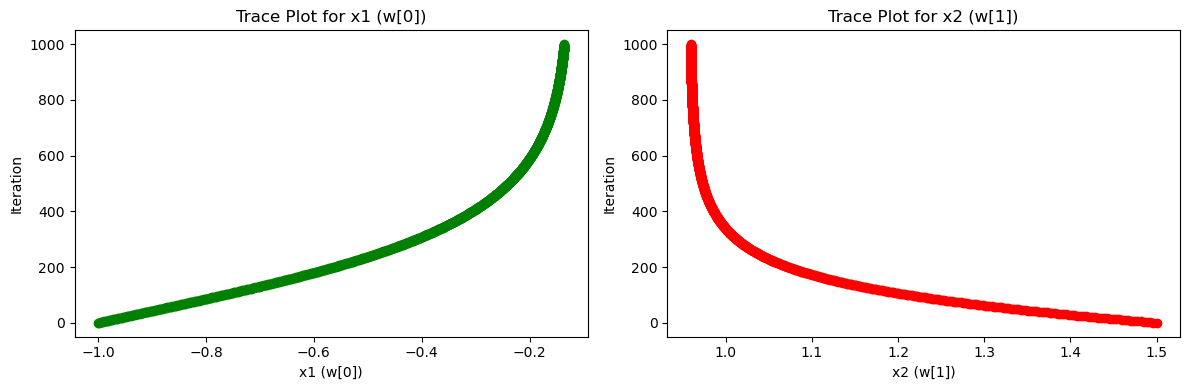

In [8]:
plt.figure(figsize=(12, 4))

# Trace Plot for x1 (w[0])
plt.subplot(121)
plt.plot(w_trace[:, 0], range(len(w_trace)), '-o', color='green')
plt.xlabel('x1 (w[0])')
plt.ylabel('Iteration')
plt.title('Trace Plot for x1 (w[0])')

# Trace Plot for x2 (w[1])
plt.subplot(122)
plt.plot(w_trace[:, 1], range(len(w_trace)), '-o', color='red')
plt.xlabel('x2 (w[1])')
plt.ylabel('Iteration')
plt.title('Trace Plot for x2 (w[1])')

plt.tight_layout()
plt.show()